In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json

In [18]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
df_US = pd.read_csv('/content/drive/MyDrive/ashutosh_work/Dataset/USvideos.csv')

In [20]:
with open('/content/drive/MyDrive/ashutosh_work/Dataset/IN_category_id.json') as f:
  data = json.load(f)

category_data = {}
for item in data['items']:
  category_data[int(item['id'])] = item['snippet']['title']
category_data

{1: 'Film & Animation',
 2: 'Autos & Vehicles',
 10: 'Music',
 15: 'Pets & Animals',
 17: 'Sports',
 18: 'Short Movies',
 19: 'Travel & Events',
 20: 'Gaming',
 21: 'Videoblogging',
 22: 'People & Blogs',
 23: 'Comedy',
 24: 'Entertainment',
 25: 'News & Politics',
 26: 'Howto & Style',
 27: 'Education',
 28: 'Science & Technology',
 29: 'Nonprofits & Activism',
 30: 'Movies',
 31: 'Anime/Animation',
 32: 'Action/Adventure',
 33: 'Classics',
 34: 'Comedy',
 35: 'Documentary',
 36: 'Drama',
 37: 'Family',
 38: 'Foreign',
 39: 'Horror',
 40: 'Sci-Fi/Fantasy',
 41: 'Thriller',
 42: 'Shorts',
 43: 'Shows',
 44: 'Trailers'}

In [21]:
cat_dat_short = {'Film & Animation' : 'F&A',
 'Autos & Vehicles' : 'A&V',
 'Music' : 'MUS',
 'Pets & Animals' : 'P&A',
 'Sports': 'SPTS',
 'Short Movies' : 'SM',
 'Travel & Events' : 'T&E',
 'Gaming': 'GAM',
 'Videoblogging': 'VBLO',
 'People & Blogs' : 'P&B',
 'Comedy' : 'COM',
 'Entertainment' : 'ENT',
 'News & Politics' : 'N&P',
 'Howto & Style' : 'H&S',
 'Education' : 'EDU',
 'Science & Technology' : 'S&T',
 'Nonprofits & Activism' : 'NP&A',
 'Movies' : 'MOV',
 'Anime/Animation' : 'ANI',
 'Action/Adventure': 'ADV',
 'Classics' : 'CLA',
 'Comedy' : 'COM',
 'Documentary': 'DOC',
 'Drama' : 'DRM',
 'Family' : 'FAM',
 'Foreign' : 'FOR',
 'Horror' : 'HRR',
 'Sci-Fi/Fantasy' : 'SCIFI',
 'Thriller': 'THRL',
 'Shorts' : 'SHO',
 'Shows' : 'SWS',
 'Trailers' : 'TRLS'}

In [22]:
df_US['Country'] = 'US'
df_US['description'] = df_US['description'].astype(str)
df_US['publish_time'] = pd.to_datetime(df_US['publish_time'])
df_US['publish_time'] = df_US['publish_time'].dt.tz_convert('US/Central')
df_US['publish_year'] = pd.DatetimeIndex(df_US['publish_time']).year
df_US['publish_month'] = pd.DatetimeIndex(df_US['publish_time']).month
df_US['publish_day'] = pd.DatetimeIndex(df_US['publish_time']).day
df_US['publish_day'] = df_US['publish_time'].dt.day_name()
df_US['publish_time_part_of_day'] = (df_US['publish_time'].dt.hour % 24 + 4) // 4
df_US['publish_time_part_of_day'] = df_US['publish_time_part_of_day'].replace({1: 'Late Night',
                                                        2: 'Early Morning',
                                                        3: 'Morning',
                                                        4: 'Noon',
                                                        5: 'Evening',
                                                        6: 'Night'})
df_US['trending_date'] = '20' + df_US['trending_date']
df_US['trending_date'] = pd.to_datetime(df_US['trending_date'], format='%Y.%d.%m')
df_US['trending_year'] = pd.DatetimeIndex(df_US['trending_date']).year
df_US['trending_month'] = pd.DatetimeIndex(df_US['trending_date']).month
df_US['trending_day'] = pd.DatetimeIndex(df_US['trending_date']).day
df_US['trending_day'] = df_US['trending_date'].dt.day_name()

# Days to trend
# Difference between the publish time and trending time
df_US['days_to_trend'] = (df_US['trending_date'].dt.date - df_US['publish_time'].dt.date).dt.days
# Replace all the days to trend greater than or equal to 8 with a very high value
df_US.loc[df_US['days_to_trend'] >= 8, 'days_to_trend'] = 333333

# Replace the high value with 8+
df_US['days_to_trend'] = df_US['days_to_trend'].astype(str)
df_US.loc[df_US['days_to_trend']=='333333', 'days_to_trend'] = '8+'

# Add category name
df_US['category'] = df_US['category_id'].replace(category_data)
df_US['cat'] = df_US['category'].replace(cat_dat_short)

possible_labels = df_US['category'].unique()

label_dict = {}
for index, possible_label in enumerate(possible_labels):
    label_dict[possible_label] = index

df_US['cat_label'] = df_US['category'].replace(label_dict)

In [23]:
df_US.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,Country,publish_year,publish_month,publish_day,publish_time_part_of_day,trending_year,trending_month,trending_day,days_to_trend,category,cat,cat_label
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13 11:13:01-06:00,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,US,2017,11,Monday,Morning,2017,11,Tuesday,1,People & Blogs,P&B,0
1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13 01:30:00-06:00,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",US,2017,11,Monday,Late Night,2017,11,Tuesday,1,Entertainment,ENT,1
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12 13:05:24-06:00,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,US,2017,11,Sunday,Noon,2017,11,Tuesday,2,Comedy,COM,2
3,puqaWrEC7tY,2017-11-14,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13 05:00:04-06:00,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,US,2017,11,Monday,Early Morning,2017,11,Tuesday,1,Entertainment,ENT,1
4,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12 12:01:41-06:00,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,US,2017,11,Sunday,Noon,2017,11,Tuesday,2,Entertainment,ENT,1


In [24]:
df_US['category'].value_counts()

Entertainment            9964
Music                    6472
Howto & Style            4146
Comedy                   3457
People & Blogs           3210
News & Politics          2487
Science & Technology     2401
Film & Animation         2345
Sports                   2174
Education                1656
Pets & Animals            920
Gaming                    817
Travel & Events           402
Autos & Vehicles          384
Nonprofits & Activism      57
Shows                      57
Name: category, dtype: int64

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.utils import compute_class_weight

class_weights = compute_class_weight(
                                        class_weight = "balanced",
                                        classes = np.unique(df_US['category']),
                                        y = df_US['category']                                                    
                                    )
class_weights = dict(zip(np.unique(df_US['category']), class_weights)),
class_weights

({'Autos & Vehicles': 6.664876302083333,
  'Comedy': 0.7403275961816604,
  'Education': 1.5454785628019323,
  'Entertainment': 0.2568559313528703,
  'Film & Animation': 1.0913912579957357,
  'Gaming': 3.132573439412485,
  'Howto & Style': 0.6172967920887602,
  'Music': 0.3954438349814586,
  'News & Politics': 1.0290761962203459,
  'Nonprofits & Activism': 44.90021929824562,
  'People & Blogs': 0.7972936137071651,
  'Pets & Animals': 2.7818614130434782,
  'Science & Technology': 1.0659360683048729,
  'Shows': 44.90021929824562,
  'Sports': 1.1772366605335787,
  'Travel & Events': 6.366449004975125},)

In [26]:
X = df_US['description'].values
Y = df_US['cat_label'].values
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=32)

In [27]:
! pip install tensorflow-text

     |████████████████████████████████| 4.9 MB 4.1 MB/s 


In [28]:
!pip install -q tf-models-official

     |████████████████████████████████| 1.8 MB 4.4 MB/s 
     |████████████████████████████████| 1.1 MB 14.3 MB/s 
     |████████████████████████████████| 47.6 MB 2.3 MB/s 
     |████████████████████████████████| 90 kB 4.4 MB/s 
     |████████████████████████████████| 213 kB 11.7 MB/s 
     |████████████████████████████████| 43 kB 1.7 MB/s 
     |████████████████████████████████| 99 kB 3.8 MB/s 
     |████████████████████████████████| 1.2 MB 13.5 MB/s 
     |████████████████████████████████| 352 kB 26.6 MB/s 


In [12]:
import tensorflow_hub as tf_hub
import tensorflow as tf
import tensorflow_text as text
from official.nlp import optimization  # to create AdamW optimizer
import matplotlib.pyplot as plt

print("Version: ", tf.__version__)
print("Eager mode: ", tf.executing_eagerly())
print("Hub version: ", tf_hub.__version__)
print("GPU is", "available" if tf.config.list_physical_devices("GPU") else "NOT AVAILABLE")


Version:  2.7.0
Eager mode:  True
Hub version:  0.12.0
GPU is available


In [14]:
# Changing target classes to categorical 

y_train = tf.keras.utils.to_categorical(y_train, 16)
y_test = tf.keras.utils.to_categorical(y_test, 16)

In [15]:
tfhub_handle_preprocess = 'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3'
tfhub_handle_encoder = 'https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4'

In [16]:
def build_classifier_model():
  text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
  preprocessing_layer = tf_hub.KerasLayer(tfhub_handle_preprocess, name='preprocessing')
  encoder_inputs = preprocessing_layer(text_input)
  encoder = tf_hub.KerasLayer(tfhub_handle_encoder, trainable=True, name='BERT_encoder')
  outputs = encoder(encoder_inputs)
  net = outputs['pooled_output']
  net = tf.keras.layers.Dropout(0.1)(net)
  net = tf.keras.layers.Dense(16, activation='softmax', name='classifier')(net)
  return tf.keras.Model(text_input, net)

In [24]:
model = build_classifier_model()
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text (InputLayer)              [(None,)]            0           []                               
                                                                                                  
 preprocessing (KerasLayer)     {'input_type_ids':   0           ['text[0][0]']                   
                                (None, 128),                                                      
                                 'input_mask': (Non                                               
                                e, 128),                                                          
                                 'input_word_ids':                                                
                                (None, 128)}                                                

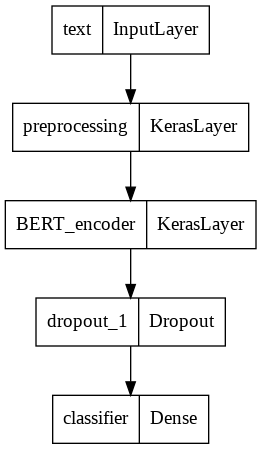

In [25]:
tf.keras.utils.plot_model(model)

In [26]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [27]:
X_train

array(["When it comes to food on the Internet, the bigger and bolder—and more rainbow colors—the better. It's a formula that's spawned a wave of Stunt Food—food whose sole purpose is to rack up likes on your Instagram feed. Chefs may not crave this kind of food, but it's no secret that they're also natural competitors. When they see something on their social feed, their first instinct is to say I can do it better. So in the spirit of duking it out in the kitchen, Alvin goes head-to-head with Top Chef alum Ilan Hall to see who has the chops to make the craziest, most gonzo Stunt Burger. And they've got an all-star panel of judges—Sean Evans, Matty Matheson, Miss Info—to see if they've gone too far. \\n\\nFirst We Feast's The Burger Show is a new web series that explores everything about modern burger culture—from the rise of Instagram-bait stunt burgers, to the enduring influence of regional styles—through the eyes of Eggslut chef, Alvin Cailan. Alvin's breakfast-sandwich empire in Los 

In [28]:
y_test

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [29]:
history = model.fit(X_train, y_train, epochs=10, class_weight=class_weights)

AttributeError: ignored